<a href="https://colab.research.google.com/github/nordop/EDA-Project/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Представленный датасет содержит информацию о характеристиках 11,914 автомобилей различных марок и моделей за период с 1990 по 2017 год. Датасет включает 16 параметров, охватывающих технические, экономические и конструктивные характеристики

Цель данного анализа заключается в комплексном исследовании автомобильного рынка с целью дать ответы на следующие вопросы:
1. Как соотносятся цена и мощность двигателя на автомобильном рынке?
2. Какие сегменты рынка (по сочетанию мощности двигателя и цены) являются наиболее насыщенными? Что это говорит о потребительских предпочтениях?
3. Есть ли "sweet spot" между ценой и топливной экономичностью (MPG), то есть диапазон цен, где машины одновременно и популярные, и относительно экономичные?


Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars features.csv')

1) Первый взгляд и описательные статистики

In [ ]:
df.shape

(11914, 16)

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


2) Очистка данных

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


В категории "Market Category" база данных демонстрирует аномальное количество нулевых значений. Рассмотрим подробнее:

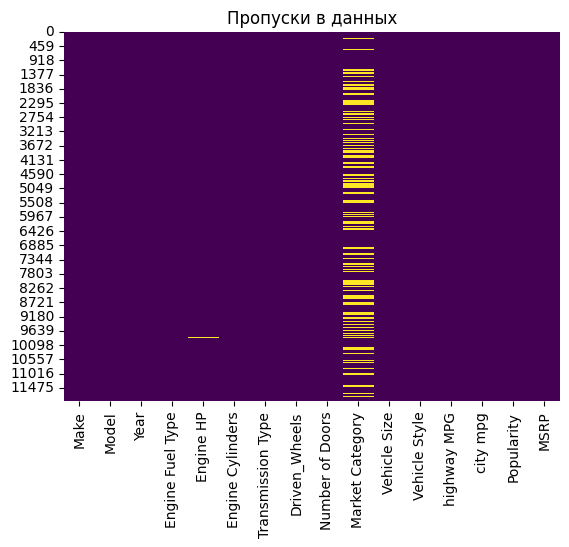

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в данных')
plt.show()

In [ ]:
df.mode(dropna=False)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Chevrolet,Silverado 1500,2015,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,24,17,1385,2000


Пропусков настолько много, что они являются модой. В таком случае мы вынуждены полностью удалить поле, чтобы не затруднять дальнейший анализ данных

In [ ]:
df = df.drop('Market Category', axis=1)
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350


Заполнение оставшихся пропусков.
Для заполнение оставшихся пропусков воспользуемся вставкой моды или медианного значения каждого поля

In [ ]:
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].median())

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


Переименуем колонку "MSRP" для удобства

In [ ]:
df = df.rename(columns={"MSRP":'Price'})

Удаление дубликатов

In [ ]:
df.shape

(11914, 15)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (720, 15)


In [ ]:
df = df.drop_duplicates()
df.shape

(11194, 15)

Работа с выбросами

Визуализируем распределение по полю 'Engine HP'

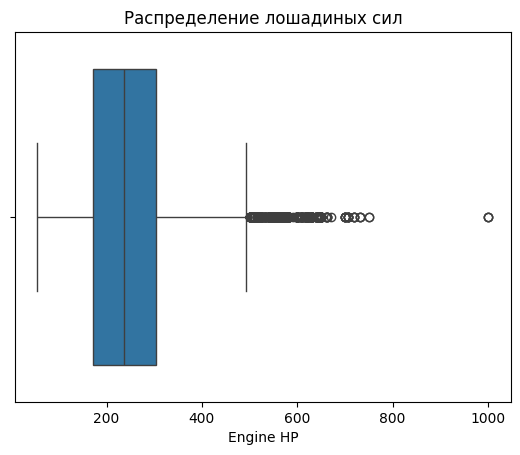

In [ ]:
sns.boxplot(x=df['Engine HP'])
plt.title('Распределение лошадиных сил')
plt.show()

Посмотрим на выбросы

In [ ]:
df[df['Engine HP'] == df['Engine HP'].max()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1705769


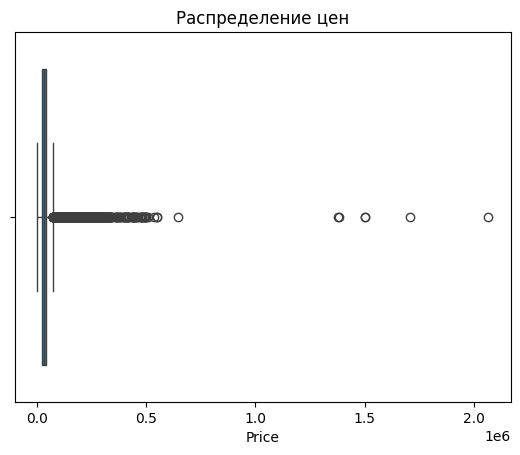

In [ ]:
sns.boxplot(x=df['Price'])
plt.title('Распределение цен')
plt.show()

Удаляем выбросы цен с помощью межквартильного размаха (IQR)

In [ ]:
# Предварительно вычислим первый и третий квартили для столбца 'Price'
Q1_p = df['Price'].quantile(0.25)
Q3_p = df['Price'].quantile(0.75)

# Вычисляем межквартильный размах
IQR_p = Q3_p - Q1_p
print("IQR для цены:\n", IQR_p)

IQR для цены:
 21439.5


In [ ]:
# Так же вычислим первый и третий квартили для столбца 'Engine HP'
Q1_hp = df['Engine HP'].quantile(0.25)
Q3_hp = df['Engine HP'].quantile(0.75)

# Вычисляем межквартильный размах
IQR_hp = Q3_hp - Q1_hp
print("IQR для двигателя:\n", IQR_hp)

IQR для двигателя:
 131.0


In [ ]:
# Рассчитаем границы
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p

lower_bound_hp = Q1_hp - 1.5 * IQR_hp
upper_bound_hp = Q3_hp + 1.5 * IQR_hp

# Применим фильтрацию
df_clear = df[(df['Price'] >= lower_bound_p) & (df['Price'] <= upper_bound_p) & ((df['Engine HP'] >= lower_bound_hp) & (df['Engine HP'] <= upper_bound_hp))]


df_clear.shape
#df_clear - очищенный датафрейм, с ним будем работать дальше

(10202, 16)

3) Визуализация данных

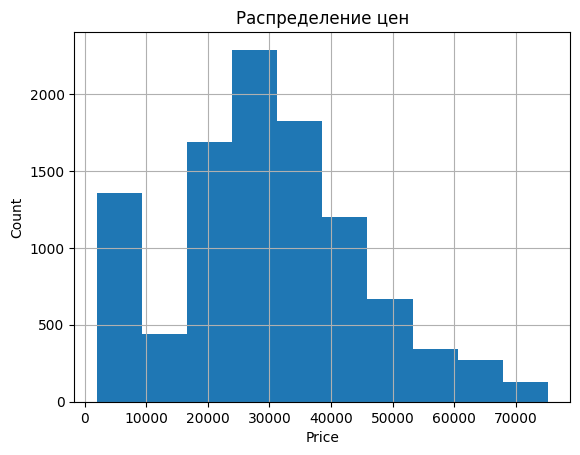

In [ ]:
df_clear['Price'].hist(bins=10)
plt.title('Распределение цен')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

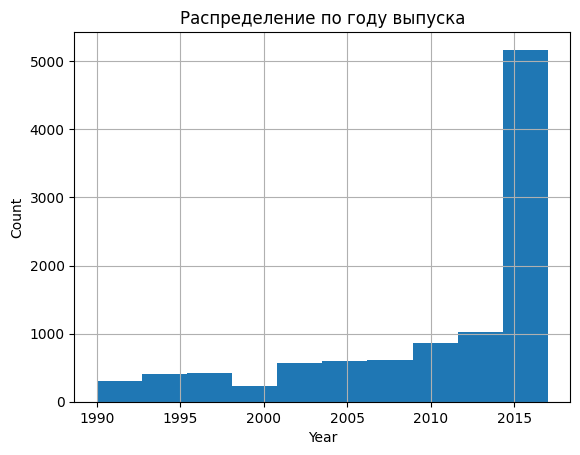

In [ ]:
df_clear['Year'].hist(bins=10)
plt.title('Распределение по году выпуска')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Make')

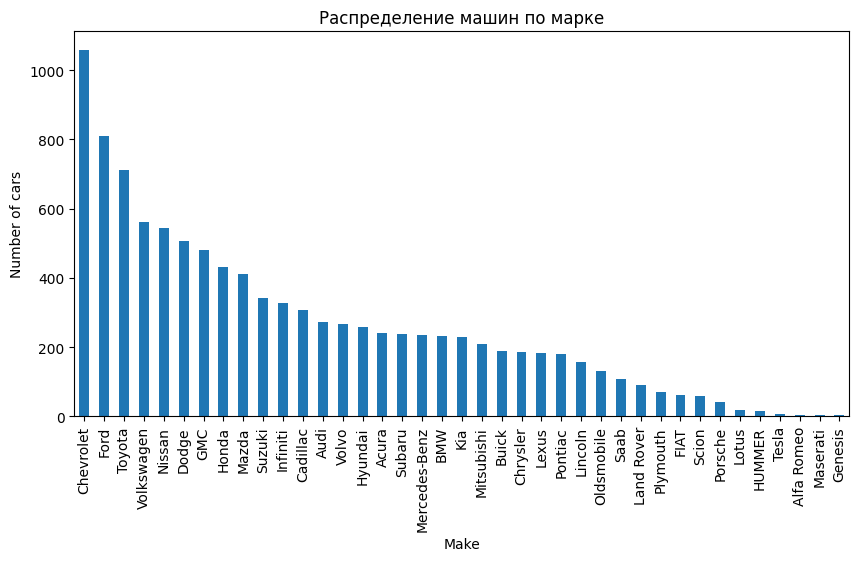

In [ ]:
df_clear.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Распределение машин по марке")
plt.ylabel('Number of cars')
plt.xlabel('Make')

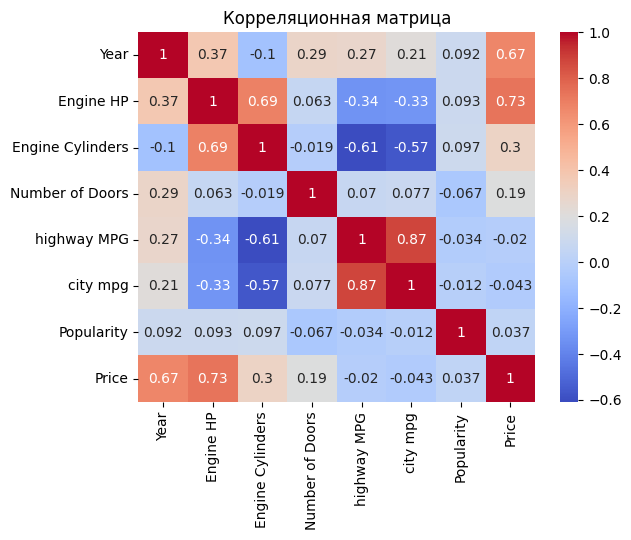

<Figure size 1000x2000 with 0 Axes>

In [ ]:
corr = df_clear.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.figure(figsize=(10,20))
plt.show()

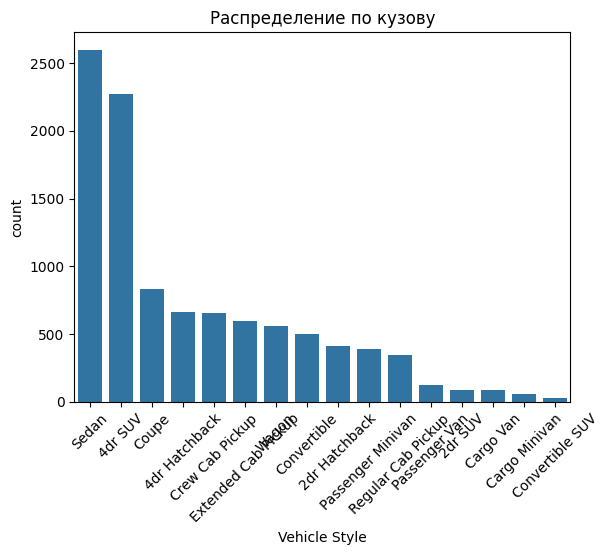

In [ ]:
# Количество по категориям
sns.countplot(x='Vehicle Style', data=df_clear, order = df_clear['Vehicle Style'].value_counts(ascending=False).index)
plt.title('Распределение по кузову')
plt.xticks(rotation=45)
plt.show()

Теперь ответим на основные исследовательские вопросы

Определим, как цена зависит от мощности двигателя

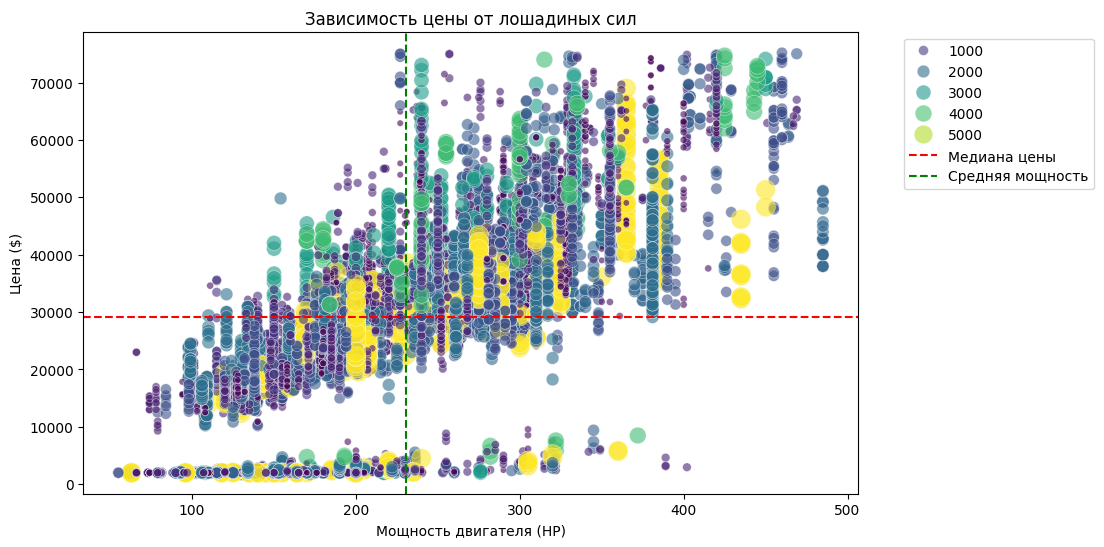

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clear, x='Engine HP', y='Price',
    alpha=0.6, palette="viridis", sizes=(20,200),
    hue='Popularity', size= 'Popularity'
)
plt.axhline(y=df_clear['Price'].median(), color='r', linestyle='--', label='Медиана цены')
plt.axvline(x=df_clear['Engine HP'].mean(), color='g', linestyle='--', label='Средняя мощность')

plt.title('Зависимость цены от лошадиных сил', fontsize=12)
plt.xlabel('Мощность двигателя (HP)')
plt.ylabel('Цена ($)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Основной рыночный сегмент
Массовый спрос сосредоточен в диапазоне 150-250 л.с. при ценах $20K–$40K. Это зона максимальной концентрации авто. К представителям этой категории можно отнести седаны D-класса, семейные кроссоверы среднего сегмента.

Четкий ценовой тренд:
Рост цены пропорционален мощности: каждые +50 л.с. дают +$15-20K к цене. За исключением премиальных авто (>350 л.с.)

Распределение по сегментам:
1.   Экономичные варианты: Ниша бюджетных авто (100-150 л.с., $5-15K) - преимущественно малолитражки

2.   Редкие предложения мощных авто по умеренным ценам (250-300 л.с. за $25-35K) - обычно б/у спорткары

3. Премиум-сегмент. Люкс-класс формирует отдельный кластер: мощность 350-600 л.с. при ценах $80-200K


Минимальная плотность небольших точек - нишевые эксклюзивные модели.
Ярко выраженный разброс цен и популярности при схожей мощности можно объяснить фактором бренда

Теперь найдем оптимальное соотношение (sweet spot) между ценой, популярностью и экономичностью

/tmp/ipython-input-1780256853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["avg_mpg"] = (df_clear["city mpg"]*0.5 + df_clear["highway MPG"]*0.5)


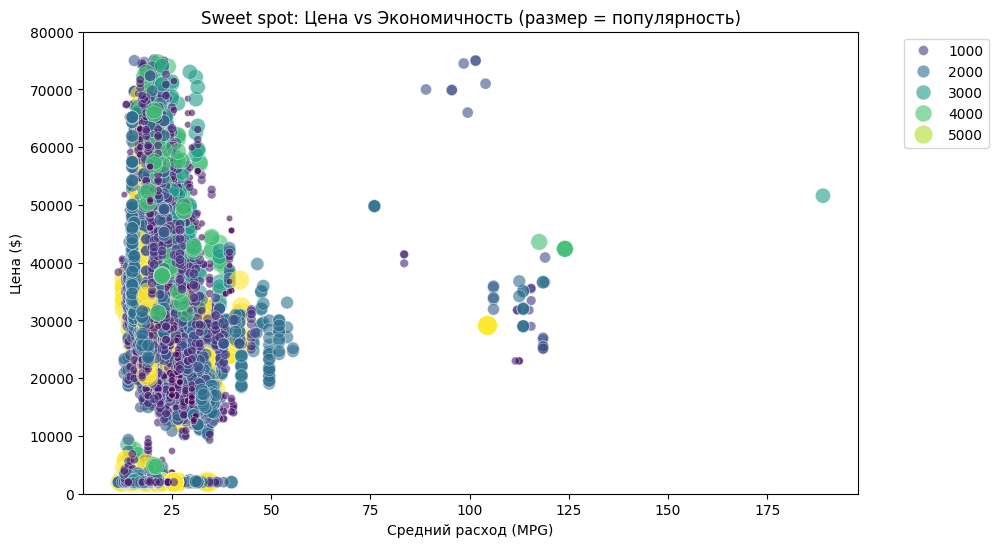

In [ ]:
# Добавим среднюю экономичность (смешанный показатель из city/highway)
df_clear["avg_mpg"] = (df_clear["city mpg"]*0.5 + df_clear["highway MPG"]*0.5)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clear, x="avg_mpg", y="Price",
    hue="Popularity", size="Popularity",
    sizes=(20,200), alpha=0.6, palette="viridis"
)
plt.title("Sweet spot: Цена vs Экономичность (размер = популярность)", fontsize=12)
plt.xlabel("Средний расход (MPG)")
plt.ylabel("Цена ($)")
plt.ylim(0,80000)  # ограничим для наглядности
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

На графике видно, что самые популярные авто сосредоточены в диапазоне $20k–40k и при этом обладают средней экономичностью 25–40 MPG. Это сегмент массового спроса, где сочетаются доступность и практичность



---

